**Watershed challenge**

By:Adriana Cruz

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In this notebook I am going to develop a data analysis about heat waves in Chile.
In order to develop a logical analytical process, the items for the notebook are (Also, according with the challenge points):

0. Overview about database
1. EDA of flux data base
2. Deep analysis about temperature and precipitations
3. Feature engineering 
4. Model development
5. Conclusions

**0. Overview about database**

In [2]:
!python -m pip install plotly

You should consider upgrading via the 'c:\Users\castrogomez.j\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [4]:
#Load the data base
#df_flux = pd.read_csv('/content/drive/MyDrive/Bain challenge/flux.csv')
df_flux = pd.read_csv('flux.csv')
df_flux.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859


In [5]:
#It is important to know data types for each column:
df_flux.dtypes

date           object
basin_id        int64
flux          float64
precip        float64
temp_max      float64
gauge_name     object
lat           float64
lon           float64
mean_elev     float64
area_km2      float64
dtype: object

So, an important step for analyzing dates is that the data type is in datetime format:

In [6]:
df_flux['date'] = pd.to_datetime(df_flux['date'])
print(df_flux.dtypes)
df_flux.head()

date          datetime64[ns]
basin_id               int64
flux                 float64
precip               float64
temp_max             float64
gauge_name            object
lat                  float64
lon                  float64
mean_elev            float64
area_km2             float64
dtype: object


,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859


**1. EDA of flux data base** 

For this session,I am going to start with univariable analysis and then, with a bivariable analysis in order to understand some possibles relations between variables, etc.

a. Descriptive stats of numeric variables

In [7]:
df_flux[[ 'flux', 'precip', 'temp_max',  'lat',
       'lon', 'mean_elev', 'area_km2']].describe()

,flux,precip,temp_max,lat,lon,mean_elev,area_km2
count,4.180480e+06,4.175037e+06,4.175037e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06
mean,5.253340e+01,2.947445e+00,1.365728e+01,-3.569572e+01,-7.129595e+01,1.760129e+03,2.404876e+03
std,1.676027e+02,8.766749e+00,6.615037e+00,8.047659e+00,1.254339e+00,1.382121e+03,4.322051e+03
min,0.000000e+00,0.000000e+00,-1.160359e+01,-5.494690e+01,-7.366670e+01,1.181229e+02,1.789123e+01
25%,8.680000e-01,0.000000e+00,9.162867e+00,-3.915000e+01,-7.231670e+01,5.847012e+02,3.761001e+02
50%,5.171000e+00,0.000000e+00,1.321396e+01,-3.588420e+01,-7.137190e+01,1.195311e+03,8.205541e+02
75%,2.990000e+01,6.422626e-01,1.805745e+01,-3.126560e+01,-7.050670e+01,3.048161e+03,2.461610e+03
max,1.580500e+04,2.132120e+02,4.081117e+01,-1.784280e+01,-6.763920e+01,4.910152e+03,5.224367e+04



With this initial information, I can get:
1. There are 4 million registers (I am going to evaluate the unique number for basin_id	)
2. There are negative values for temperature 
3. The area variable just have positive values, which is consistent with a measure variable

In [8]:
#Unique basin_id
print(len(df_flux['basin_id'].unique()))

503


There are 503 unique stations

b. Look about dates

In [9]:
print("Min date is " , df_flux['date'].min())
print("Max date is " , df_flux['date'].max())

Min date is  1980-01-01 00:00:00
Max date is  2020-06-06 00:00:00


c. In order to understand the numerical variables distribution, I make violin plot graphics for each variable:

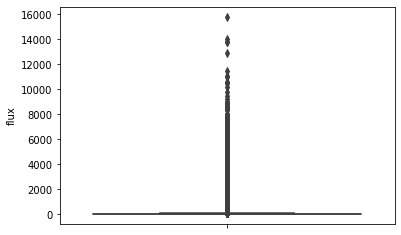

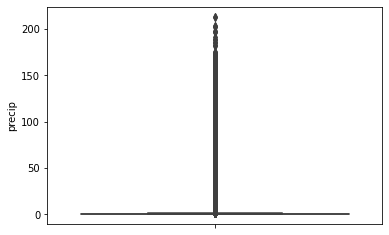

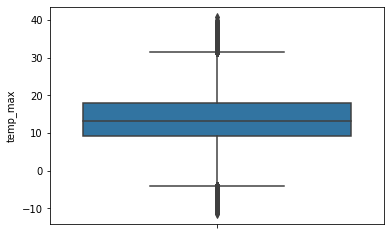

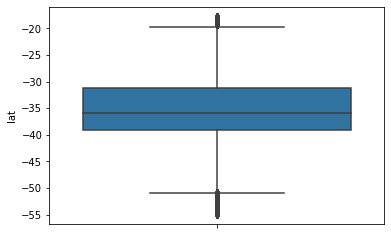

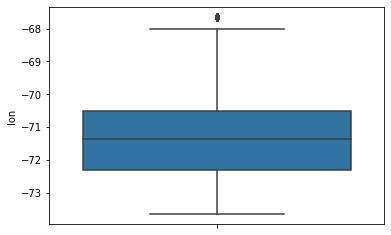

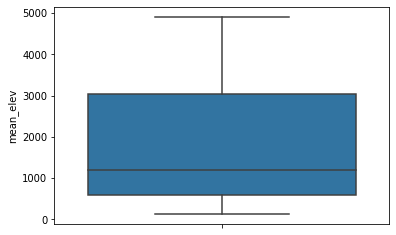

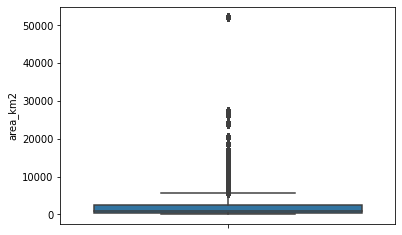

In [10]:
for i in [ 'flux', 'precip', 'temp_max',  'lat',
       'lon', 'mean_elev', 'area_km2']:
   plt.figure() 
   sns.boxplot( y=i, data=df_flux)

c.1 Correlation between variables

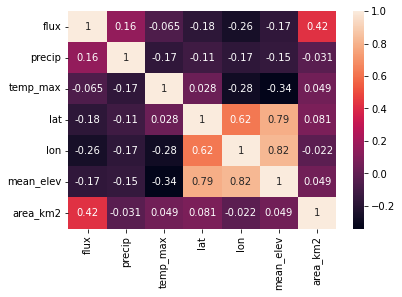

In [104]:
df_corr = df_flux[[ 'flux', 'precip', 'temp_max',  'lat',
       'lon', 'mean_elev', 'area_km2']]

corrMatrix = df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Correlation analysis in too important for: 
1. Recognize variables with possible multicollinearity
2. See variables that are correlated with target 
3. Identify the "sign" of the correlation : Negative or positive correlation? 

In this case, some insights are: 
a. There is a relation between location variables and avg_max_temp
b. apparently, there are not other big correlations.

Also, VIF method could be used to identify in a formal way that multicollinearity

d. For the case of bivariable analysis, I thought about graph the numerical variables vs stations, however, the number of stations is big. For this, I proposed to make a cluster with geographic information and the other numerical variables, in order to identify possible clusters that discriminate different behaviors according with location  

Clustering similar stations

In [11]:
#df_stations = df_flux.groupby(by=['basin_id'], as_index=False)['lat', 'lon', 'mean_elev'].first()
df_stations = df_flux.groupby(by=['basin_id'], as_index=False)['lat', 'lon'].first()
df_stations.set_index(['basin_id'], inplace=True)
df_stations

C:\Users\CASTRO~1.J\AppData\Local\Temp\1/ipykernel_11144/2595157799.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_stations = df_flux.groupby(by=['basin_id'], as_index=False)['lat', 'lon'].first()


,lat,lon
basin_id,,
1001001,-18.0769,-69.1961
1001002,-17.9942,-69.2550
1001003,-18.0156,-69.2308
1020002,-18.1936,-69.2458
1020003,-18.2325,-69.3319
...,...,...
12872001,-53.8056,-68.6725
12876001,-53.8928,-68.8844
12876004,-54.0411,-68.7975


In [12]:
df_mean_variables = df_flux.groupby(by=['basin_id'], as_index=False)[ 'flux', 'precip', 'temp_max'].mean()
df_mean_variables.head()

C:\Users\CASTRO~1.J\AppData\Local\Temp\1/ipykernel_11144/3320531723.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean_variables = df_flux.groupby(by=['basin_id'], as_index=False)[ 'flux', 'precip', 'temp_max'].mean()


,basin_id,flux,precip,temp_max
0,1001001,0.447502,1.247240,9.250165
1,1001002,1.145109,1.122074,10.079816
2,1001003,0.221237,1.315032,9.668089
3,1020002,0.409280,1.149200,9.332745
4,1020003,0.147523,1.115713,9.569033


Now, in order to develop a clustering model I normalized the variables:

In [13]:
for i in [ 'flux', 'precip', 'temp_max']:
        df_mean_variables[i]=(df_mean_variables[i]-df_mean_variables[i].mean())/df_mean_variables[i].std()
df_mean_variables.head()

,basin_id,flux,precip,temp_max
0,1001001,-0.413647,-0.751755,-1.126188
1,1001002,-0.408292,-0.803866,-0.924522
2,1001003,-0.415384,-0.723532,-1.024602
3,1020002,-0.413941,-0.792572,-1.106115
4,1020003,-0.415950,-0.806514,-1.048679


In [14]:
df_cluster = df_stations.merge(df_mean_variables, on = 'basin_id', how = 'inner' )


In [15]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,init ='k-means++')
    km = km.fit(df_cluster[['lat'	,'lon'	,'flux',	'precip',	'temp_max']])
    Sum_of_squared_distances.append(km.inertia_)

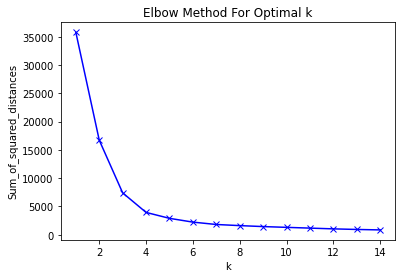

In [16]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
km = KMeans(n_clusters=4,init ='k-means++')
km = km.fit(df_cluster[['lat'	,'lon'	,'flux',	'precip',	'temp_max']])
df_cluster['cluster_label'] = km.fit_predict(df_cluster)
centers = km.cluster_centers_ # Coordinates of cluster centers.
#labels = km.predict(df_cluster[['lat'	,'lon'	,'flux',	'precip',	'temp_max']]) # Labels of each point
df_cluster.head(10)

,basin_id,lat,lon,flux,precip,temp_max,cluster_label
0,1001001,-18.0769,-69.1961,-0.413647,-0.751755,-1.126188,0
1,1001002,-17.9942,-69.2550,-0.408292,-0.803866,-0.924522,0
2,1001003,-18.0156,-69.2308,-0.415384,-0.723532,-1.024602,0
3,1020002,-18.1936,-69.2458,-0.413941,-0.792572,-1.106115,0
4,1020003,-18.2325,-69.3319,-0.415950,-0.806514,-1.048679,0
5,1021001,-18.5833,-69.0467,-0.397696,-0.887359,-0.854887,0
6,1021002,-18.4931,-69.1494,-0.414361,-0.882564,-0.889661,0
7,1041002,-19.2711,-68.6797,-0.413228,-1.026737,-0.590970,0
8,1044001,-19.8586,-68.5858,-0.415443,-1.037342,-0.576103,0
9,1050002,-20.0344,-68.8311,-0.415970,-1.019021,-0.803447,0


In [18]:
df_cluster.cluster_label.value_counts()

1    163
3    141
2    131
0     68
Name: cluster_label, dtype: int64

With this previous result, I plot a simple image with lat and lon and the clusters selected. And the image shows four clusters that correspond to location, but in the next part I am going to analyze the descriptive stats for each variable

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'clusters')

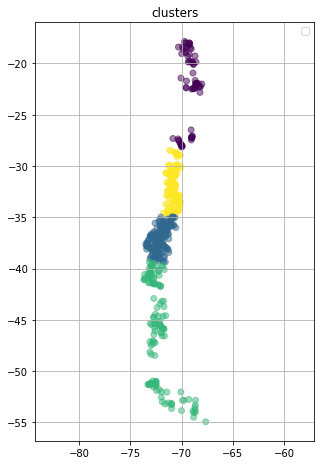

In [50]:
fig, ax = plt.subplots(figsize=(5, 10))
plt.scatter(df_cluster.lon, df_cluster.lat, c= df_cluster.cluster_label.values, alpha=0.5)
ax.set_aspect("equal")
ax.set_box_aspect(1.5)
ax.grid(True)
ax.legend()
plt.title('clusters')



Descriptions by cluster

In [20]:
for i in [0,1,2,3]:
    print('Descriptive stats for cluster: '+ str(i))
    print(df_cluster[df_cluster['cluster_label']==i][['lat'	,'lon'	,'flux',	'precip',	'temp_max']].describe())

Descriptive stats for cluster: 0
             lat        lon       flux     precip   temp_max
count  68.000000  68.000000  68.000000  68.000000  68.000000
mean  -22.216285 -69.248154  -0.411245  -1.067372  -0.566478
std     3.541156   0.622797   0.005626   0.118400   0.722225
min   -28.147800 -70.838100  -0.416978  -1.223120  -1.959795
25%   -26.630600 -69.675025  -0.415160  -1.152589  -1.030621
50%   -21.954450 -69.172750  -0.413038  -1.091020  -0.714425
75%   -19.099675 -68.838375  -0.409073  -1.026718  -0.245954
max   -17.842800 -68.026900  -0.392540  -0.723532   1.732598
Descriptive stats for cluster: 1
              lat         lon        flux      precip    temp_max
count  163.000000  163.000000  163.000000  163.000000  163.000000
mean   -37.092044  -72.086641    0.107644    0.692992    0.692783
std      1.172199    0.689578    0.946731    0.590406    0.590640
min    -39.360000  -73.483300   -0.413803   -0.549755   -0.707369
25%    -37.953900  -72.539150   -0.357698    0.250864  

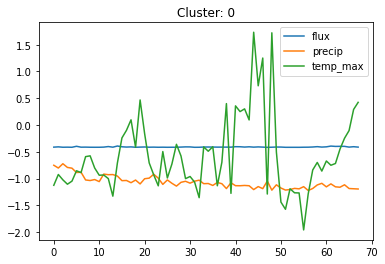

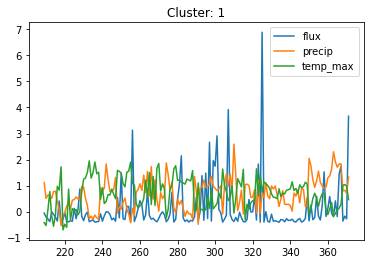

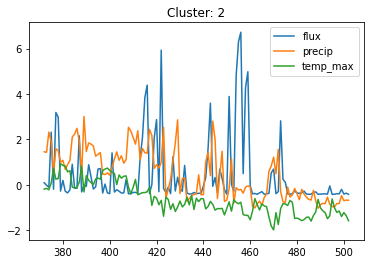

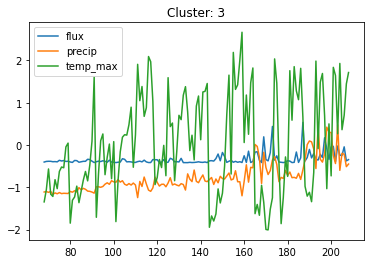

In [21]:
for i in [0,1,2,3]:
    df_temp = df_cluster[df_cluster['cluster_label']==i]
    plt.figure()
    for j in ['flux',	'precip',	'temp_max']:
        df_temp[j].plot( )
        plt.title('Cluster: ' + str(i))
        plt.legend(['flux',	'precip',	'temp_max'])

Also, it is important to take into account that in chile there are seasons. So, the temperature changes according to that, for example. This is a exogenous variable and I join it in this section.

In [22]:
summer = [1, 2, 3]
autumn = [4,5,6]
winter = [7,8,9]
spring = [10,11,12]

In [23]:
df_flux['season'] = 'summer'
df_flux['season'] = np.where(df_flux.date.dt.month.isin(autumn), 'autumn',df_flux['season'])
df_flux['season'] = np.where(df_flux.date.dt.month.isin(winter), 'winter',df_flux['season'])
df_flux['season'] = np.where(df_flux.date.dt.month.isin(spring), 'spring',df_flux['season'])

In [24]:
df_flux = pd.merge(df_flux,df_stations.drop(['lat','lon'], axis=1),how='left', on='basin_id')
df_flux

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,season
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
...,...,...,...,...,...,...,...,...,...,...,...
4180475,2020-06-02,12930001,0.375,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,autumn
4180476,2020-06-03,12930001,0.342,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,autumn
4180477,2020-06-04,12930001,0.325,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,autumn
4180478,2020-06-05,12930001,0.311,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,autumn


Functions for time series

In [25]:
def plot_one_timeserie(cod_station, variable, min_date, max_date):
    df_temp = df_flux[(df_flux['basin_id'] == cod_station) & (df_flux['date']>min_date) & (df_flux['date']<max_date)][['date',variable,'gauge_name']]
    name_station = df_temp['gauge_name'].unique()
    plt.figure(figsize= (15,10))
    plt.plot(df_temp['date'], df_temp[variable], color='red', label='blogs_unread', linewidth=3)

    plt.xlabel('Date')
    plt.xlabel(variable)
    plt.title('Time series for ' + variable + " and station " + str(name_station))


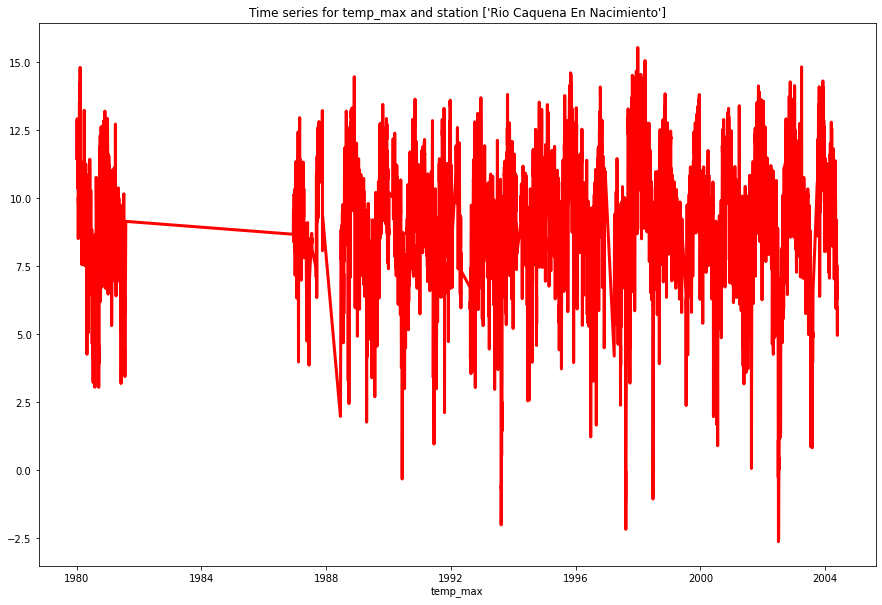

In [26]:

plot_one_timeserie(1001001, 'temp_max', '1980-01-01', '2020-01-01')


Second time series function

In [27]:
df_flux.columns

Index(['date', 'basin_id', 'flux', 'precip', 'temp_max', 'gauge_name', 'lat',
       'lon', 'mean_elev', 'area_km2', 'season'],
      dtype='object')

In [28]:
def plot_three_timeseries(cod_station, min_date, max_date):
    df_temp = df_flux[(df_flux['basin_id'] == cod_station) & (df_flux['date']>min_date) & (df_flux['date']<max_date)]
    variables = ['flux', 'precip', 'temp_max']
    fig = plt.figure(figsize= (15,10))
    for i in variables:
        df_temp2 = df_temp[['date',i,'gauge_name']]
        df_temp2[i]=(df_temp2[i]-df_temp2[i].mean())/df_temp2[i].std()
        name_station = df_temp2['gauge_name'].unique()

        plt.plot(df_temp2['date'], df_temp2[i],  label='blogs_unread', linewidth=3)

    plt.xlabel('Date')
    plt.xlabel(i)
    plt.title('Time series for ' + i + " and station " + str(name_station))
    plt.legend(['flux', 'precip', 'temp_max',  'mean_elev'])

C:\Users\CASTRO~1.J\AppData\Local\Temp\1/ipykernel_11144/2515463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2[i]=(df_temp2[i]-df_temp2[i].mean())/df_temp2[i].std()
C:\Users\CASTRO~1.J\AppData\Local\Temp\1/ipykernel_11144/2515463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2[i]=(df_temp2[i]-df_temp2[i].mean())/df_temp2[i].std()
C:\Users\CASTRO~1.J\AppData\Local\Temp\1/ipykernel_11144/2515463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

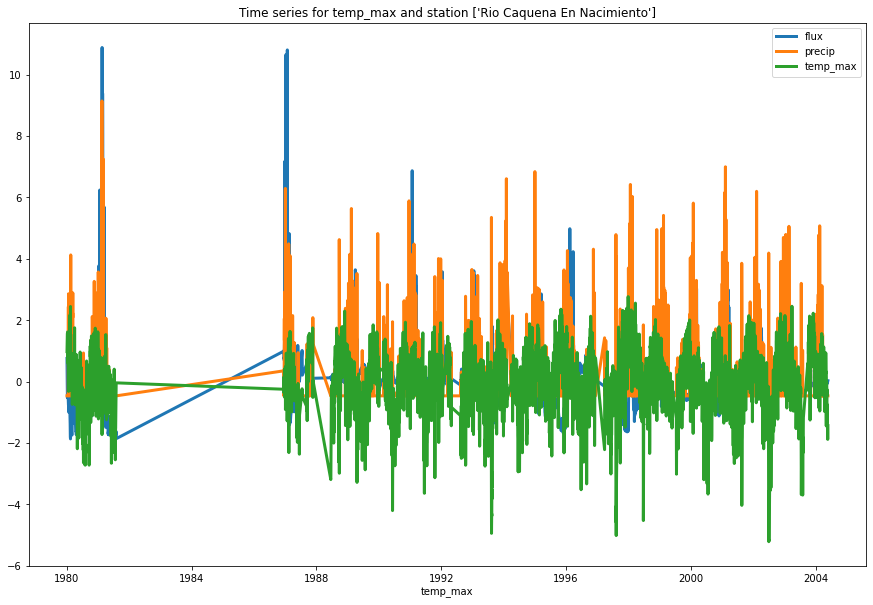

In [29]:
plot_three_timeseries(1001001,  '1980-01-01', '2020-01-01')

Feature analysis

In [60]:
df_flux['flux_extreme'] = np.where(df_flux['flux'] > df_flux['flux'].quantile( .95), 1, 0)
df_flux['temp_extreme'] = np.where(df_flux['temp_max'] > df_flux['temp_max'].quantile( .95), 1, 0)
df_flux['precip_extreme'] = np.where(df_flux['precip'] > df_flux['precip'].quantile( .95), 1, 0)

In [61]:
df_flux.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,season,flux_extreme,temp_extreme,precip_extreme
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0


In order to identify outliers I propose the next ideas: 
1. Use IQR as a threshold of outliers
2. Ask to business (experts in the topic) about what they consider as an outlier for each variable. 
3. Validate the business answers with the options of percentiles or IQR, or even choose the business suggestions if the threshold are not according with the context

**Flux extreme plot**

In order to answer if there are any different behaviours among different watersheds, I use the cluster results.

In [72]:
df_flux2 =  df_flux.merge(df_cluster, on = 'basin_id', how= 'left')[['date', 'basin_id', 'flux_x', 'precip_x', 'temp_max_x', 'gauge_name',
       'lat_x', 'lon_x', 'mean_elev', 'area_km2', 'season', 'flux_extreme_x',
       'temp_extreme_x', 'precip_extreme_x', 'cluster_label']]
df_flux2.head()

,date,basin_id,flux_x,precip_x,temp_max_x,gauge_name,lat_x,lon_x,mean_elev,area_km2,season,flux_extreme_x,temp_extreme_x,precip_extreme_x,cluster_label
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0,0
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0,0
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0,0
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0,0
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer,0,0,0,0


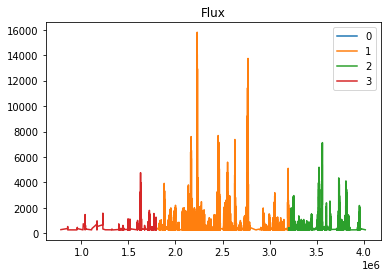

In [100]:
for i in [0,1,2,3]:
    df_ = df_flux2[(df_flux2['cluster_label']==i) & (df_flux2['flux_extreme_x']==1)]
    plt.plot(df_['flux_x'])
    plt.title('Flux')
    plt.legend([0,1,2,3])

According with the graphic not all watershelds have extreme flux, for example cluster 0 does not have extreme flux registers. Also, for the different clusters there are different intervals of the extreme flux. So, extreme flux events could be correlated with location

Text(0.5, 1.0, 'Percentage of extreme flux events over the time')

<Figure size 1080x1440 with 0 Axes>

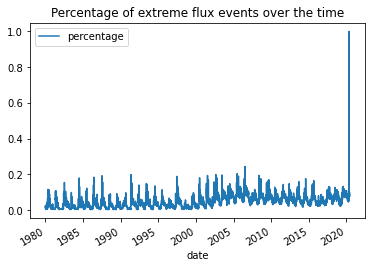

In [93]:
df_1 = df_flux2.groupby(['date'],as_index = False)['cluster_label'].sum()
df_2 = df_flux2[(df_flux['flux_extreme'] == 1 ) ]
df_3 = df_2.groupby(['date'],as_index = False)['cluster_label'].sum()
df_final = df_3.merge(df_1 , on = 'date', how = 'inner')
df_final['percentage'] = df_final['cluster_label_x'] / df_final['cluster_label_y']
plt.figure(figsize = (15,20))
df_final.plot(x='date', y = 'percentage')
plt.title('Percentage of extreme flux events over the time')

Apparently, the events have not become more frequent, except for the peak on 2020

**Model Development**

Taking into account there is a problem with values that are related with time, there must be carefully the selection of the model and the features. If it does not take into account an autocorrelation problem could appear, for example.

In this case, I propose a forecast model with prophet library, in order to predict the flux level. Other possible ideas are:

1. Develop a boosting model with a hyperparameter optimization (with gridsearch for example)

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py


In [ ]:
#Data preparation
df_forecast = df_flux[['date','flux_x']]
add_variables = df_flux[['date','flux_x', 'lat', 'lon', 'season']]

In [ ]:
train_dataset= pd.DataFrame()
test_dataset = pd.DataFrame()
train_dataset['ds'] = df_forecast[df_forecast['date'] < '2015-01-01']['date']
train_dataset['y']= df_forecast[df_forecast['date'] < '2015-01-01']['flux_x']
test_dataset['ds'] = df_forecast[df_forecast['date'] >= '2015-01-01']['date']
test_dataset['y']= df_forecast[df_forecast['date'] >= '2015-01-01']['flux_x']


In [ ]:
m = Prophet()
m.add_regressor('lat')
m.add_regressor('lon')
m.add_regressor('season')
m.fit(train_dataset)


future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)


Unfortunately, I didn't manage to get the model error. But the idea is to use the MSE as a measure and the base model for comparison would be the one without regressors.
Also, There could be a parameter optimization. In addition, other time series models could be prove with the complete analysis of: trend , seasonality, serial correlation

If i had done a classification model the metrics useful to identify at least 70% of the extreme flux events are: accuracy , f1 -score. This two metrics help to identify true positves and false positives 